In [6]:
from torchvision.io import read_image, write_png
import torch

from sigk.layers.dwt import Dwt2D, IDwt2D, COHEN_DAUBECHIES_FEAUVEAU_9_7_WAVELET
import matplotlib.pyplot as plt

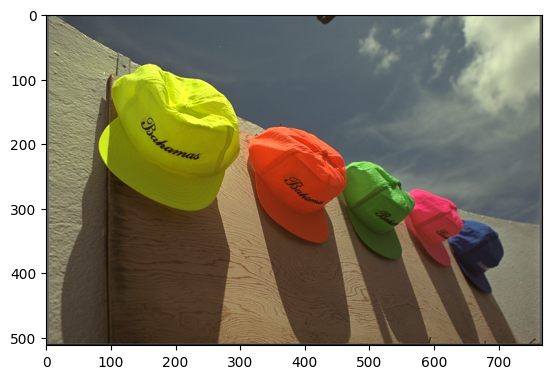

In [3]:
def show(image):
    plt.clf()
    plt.imshow(image.movedim(0, -1))
    plt.show()


image = read_image("kodak03.png").to(torch.float32) / 255.

show(image)

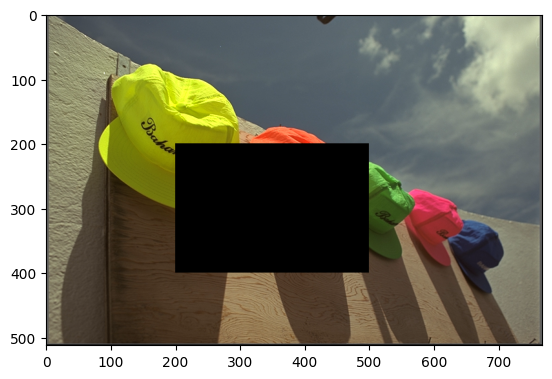

In [5]:
cutted = image.clone()
cutted[..., 200:400, 200:500] = 0.

show(cutted)

In [15]:
def show_piece(axe, image):
    axe.imshow(image.squeeze(0).movedim(0, -1))

def show_dwt_result(result):
    ll, lh, hl, hh = result

    plt.clf()
    _, axes = plt.subplots(2, 2, figsize=(18, 8))
    show_piece(axes[0, 0], ll)
    show_piece(axes[0, 1], lh)
    show_piece(axes[1, 0], hl)
    show_piece(axes[1, 1], hh)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.06578596..1.0800802].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.39084977..0.6711164].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.53137004..0.3984289].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.51260924..0.5087672].


<Figure size 640x480 with 0 Axes>

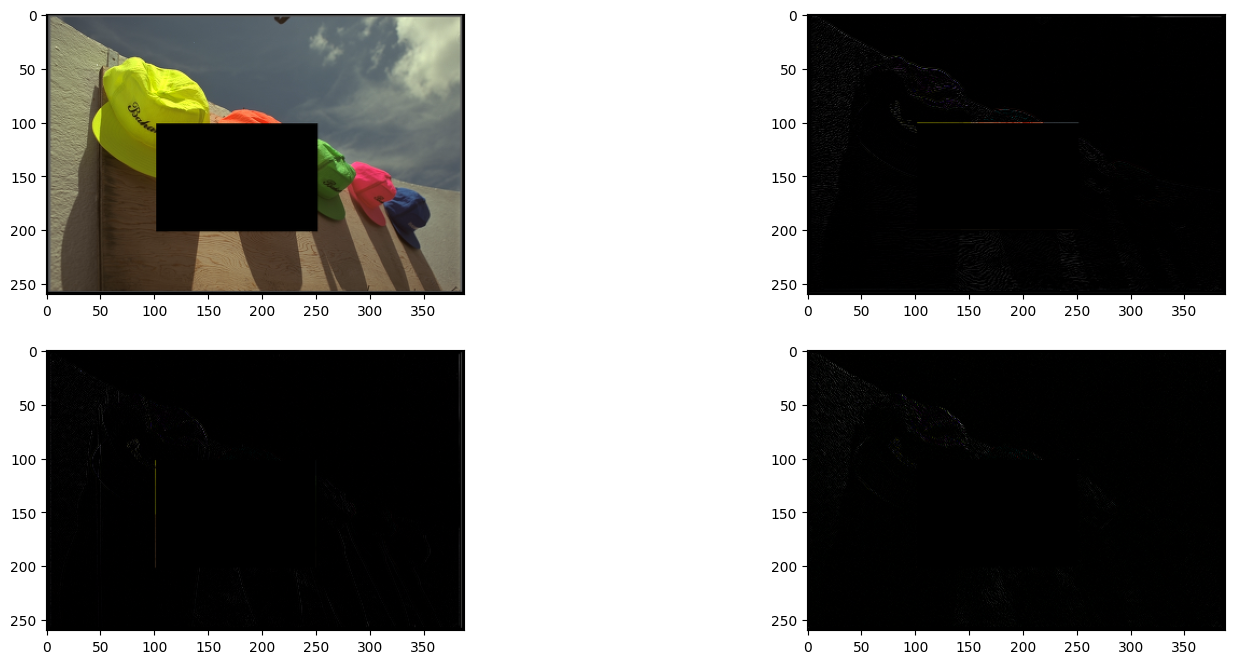

In [16]:
dwt = Dwt2D(channels=3, wavelet=COHEN_DAUBECHIES_FEAUVEAU_9_7_WAVELET)

result = dwt(cutted.unsqueeze(0))

show_dwt_result(result)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.033158194..1.037486].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.37641802..0.42645395].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.33686808..0.3984289].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.51260924..0.5087672].


<Figure size 640x480 with 0 Axes>

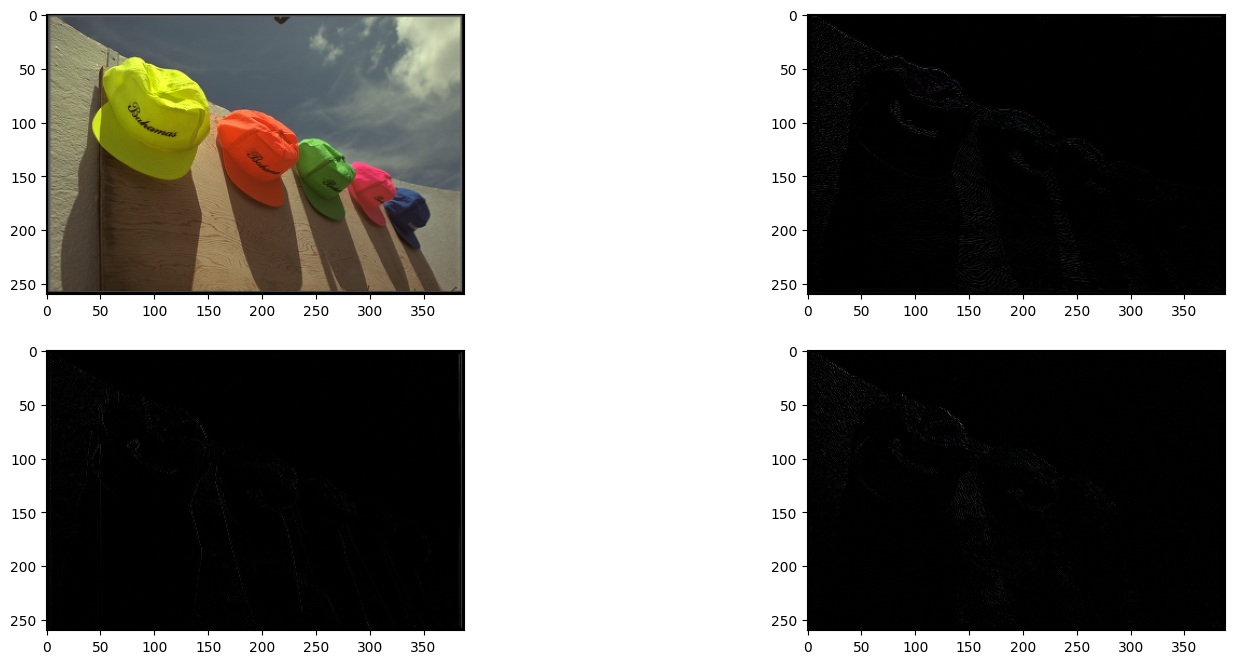

In [18]:
normal_dwt = dwt(image.unsqueeze(0))

show_dwt_result(normal_dwt)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.033158194..1.037486].


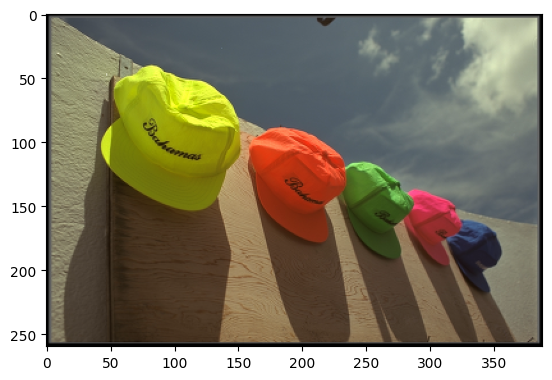

In [20]:
normal_ll = normal_dwt[0]

show(normal_ll.squeeze(0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.033158194..1.037486].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.39084977..0.6711164].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.53137004..0.3984289].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.51260924..0.5087672].


<Figure size 640x480 with 0 Axes>

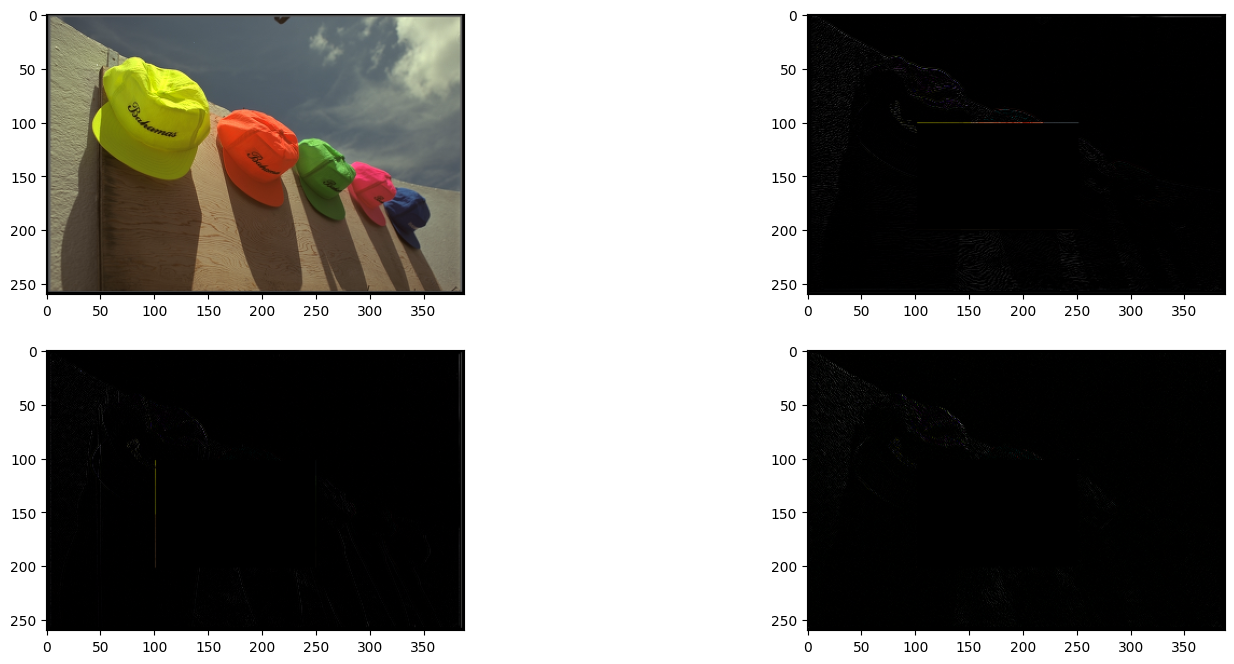

In [21]:
recon = (normal_ll, *result[1:])

show_dwt_result(recon)

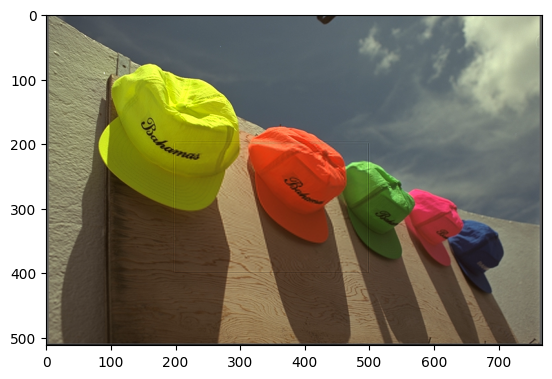

In [24]:
idwt = IDwt2D(channels=3, wavelet=COHEN_DAUBECHIES_FEAUVEAU_9_7_WAVELET)

recon_on_augumented = idwt(recon).clamp(0, 1)

show(recon_on_augumented.squeeze(0))

write_png((recon_on_augumented.squeeze(0) * 255.).to(torch.uint8), "kodak03_recon.png")